# Forward Euler Evolution

In [1]:
using Plots

gr()

Plots.GRBackend()

## FEE step
definition of the FEE elementary step

In [2]:
function fee(rho_t, alpha)
    rho_t1 = deepcopy(rho_t)
    
    rho_t1 -= (alpha / 2) * (circshift(rho_t, 1) - circshift(rho_t, -1))
end

# Test it
a = [1:10...]
transpose([a fee(a, 1)])

2×10 LinearAlgebra.Transpose{Float64,Array{Float64,2}}:
  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0   9.0  10.0
 -3.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0   6.0

## PBC
periodic boundary conditions

In [3]:
function pbc()
    n_t = 107
    n_x = 1000

    alpha = 1;

    k = 2
    shift= 0.
    rho_t0 = [sin(k*(i/n_x - shift)*π)  for i in 1:n_x];
    
    rho_tm = deepcopy(rho_t0)
    rho = rho_tm

    for i = 1:(n_t-1)
        # evolve
        rho_tm1 = fee(rho_tm, alpha)

        #println(round.(rho_tm1, digits=1))
        # update current
        rho_tm = deepcopy(rho_tm1)

        rho = [rho rho_tm1]
    end

    rho = transpose(rho)
end

rho_pbc = pbc();

### analyze

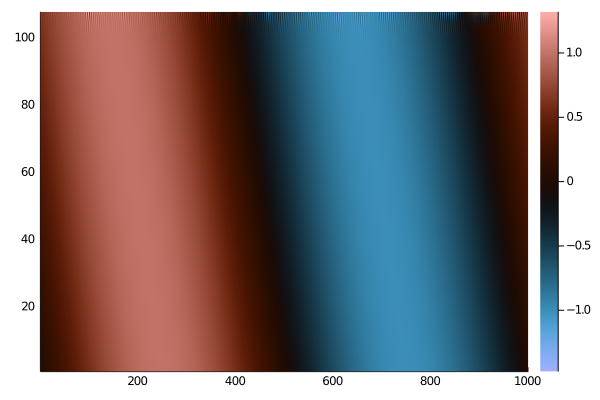

In [4]:
heatmap(rho_pbc[:,:], c = :berlin)

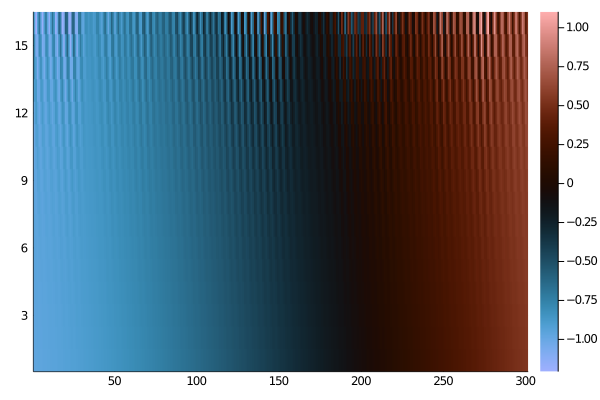

In [5]:
heatmap(rho_pbc[end-15:end,end*14÷20:end], c = :berlin)

## PBC stabilized
periodic boundary conditions with rolling averages for numerical stabilization

In [6]:
moving_average(vs,n) = [sum(@view circshift(vs,1-i)[1:n])/n for i in 1:length(vs)]

moving_average (generic function with 1 method)

In [7]:
function pbc_av()
    n_t = 107
    n_x = 1000

    alpha = 6.4;

    k = 2
    shift= 0.
    rho_t0 = [sin(k*(i/n_x - shift)*π)  for i in 1:n_x];

    rho_tm = deepcopy(rho_t0)
    rho = rho_tm

    for i = 1:(n_t-1)
        # evolve
        #rho_tm1 = moving_average(fee(rho_tm, alpha), 100)
        rho_tm1 = moving_average(fee(rho_tm, alpha), 10)

        # update current
        rho_tm = deepcopy(rho_tm1)

        rho = [rho rho_tm1]
    end

    rho = transpose(rho)
end

rho_pbc_av = pbc_av();

### analyze

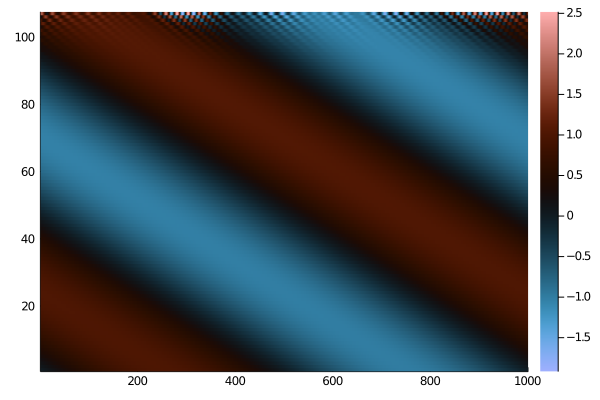

In [8]:
heatmap(rho_pbc_av[:,:], c = :berlin)

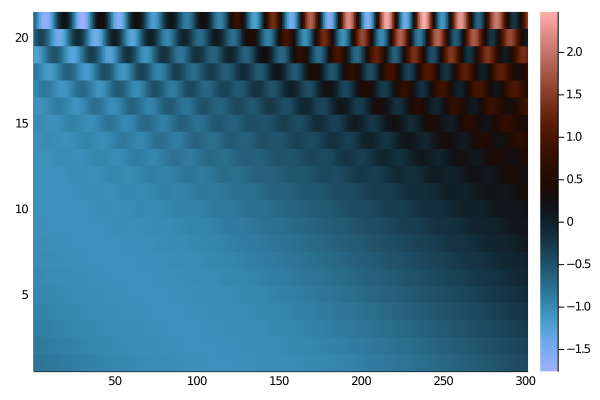

In [9]:
heatmap(rho_pbc_av[end-20:end,end*14÷20:end], c = :berlin)

## ZBC
Set boundary to 0

In [10]:
function zbc()
    n_t = 100
    n_x = 1000

    alpha = 1;

    k = 3
    shift= 0.1
    rho_t0 = [sin(k*(i/n_x - shift)*π)  for i in 1:n_x]
    rho_x0 = fill(0, n_t - 1)
    rho_xn = fill(0, n_t - 1);

    rho_tm = deepcopy(rho_t0)
    rho = rho_tm

    for t = 1:(n_t-1)
        # evolve
        rho_tm1 = fee(rho_tm, alpha)

        # impose boundary conditions
        rho_tm1[1] = rho_x0[t]
        rho_tm1[end] = rho_xn[t]

        # update current
        rho_tm = deepcopy(rho_tm1)

        rho = [rho rho_tm1]
    end

    rho = transpose(rho)
end

rho_zbc = zbc();

### analyze

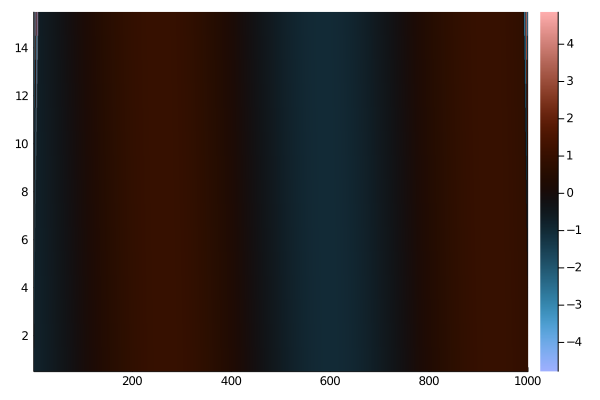

In [12]:
heatmap(rho_zbc[1:15,:], c = :berlin)

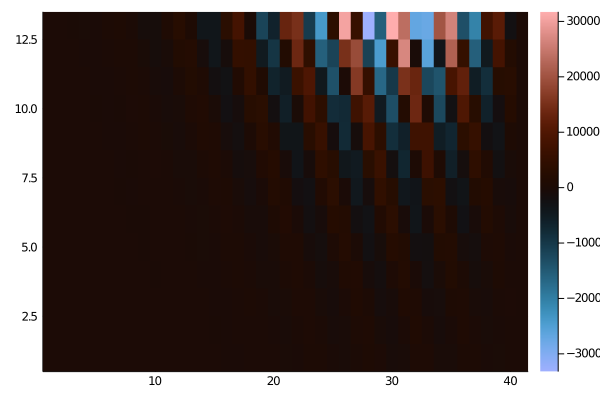

In [19]:
heatmap(rho_zbc[end-12:end,end*48÷50:end], c = :berlin)